In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [ ]:
df = pd.read_csv("./datasets/custom_price/CustomDataset.csv", index_col = "Roll No")

In [ ]:
df.tail()

,Sem I - Paper I,Sem I - Paper II,Sem II - Paper I,Sem II - Paper II,Sem III - Paper I,Sem III - Paper II,Sem IV
Roll No,,,,,,,
21,67,75,78,68,42,76,P
22,67,80,85,87,76,78,P
23,67,70,92,80,89,91,P
24,67,72,55,62,58,32,F
25,49,52,38,41,46,42,F


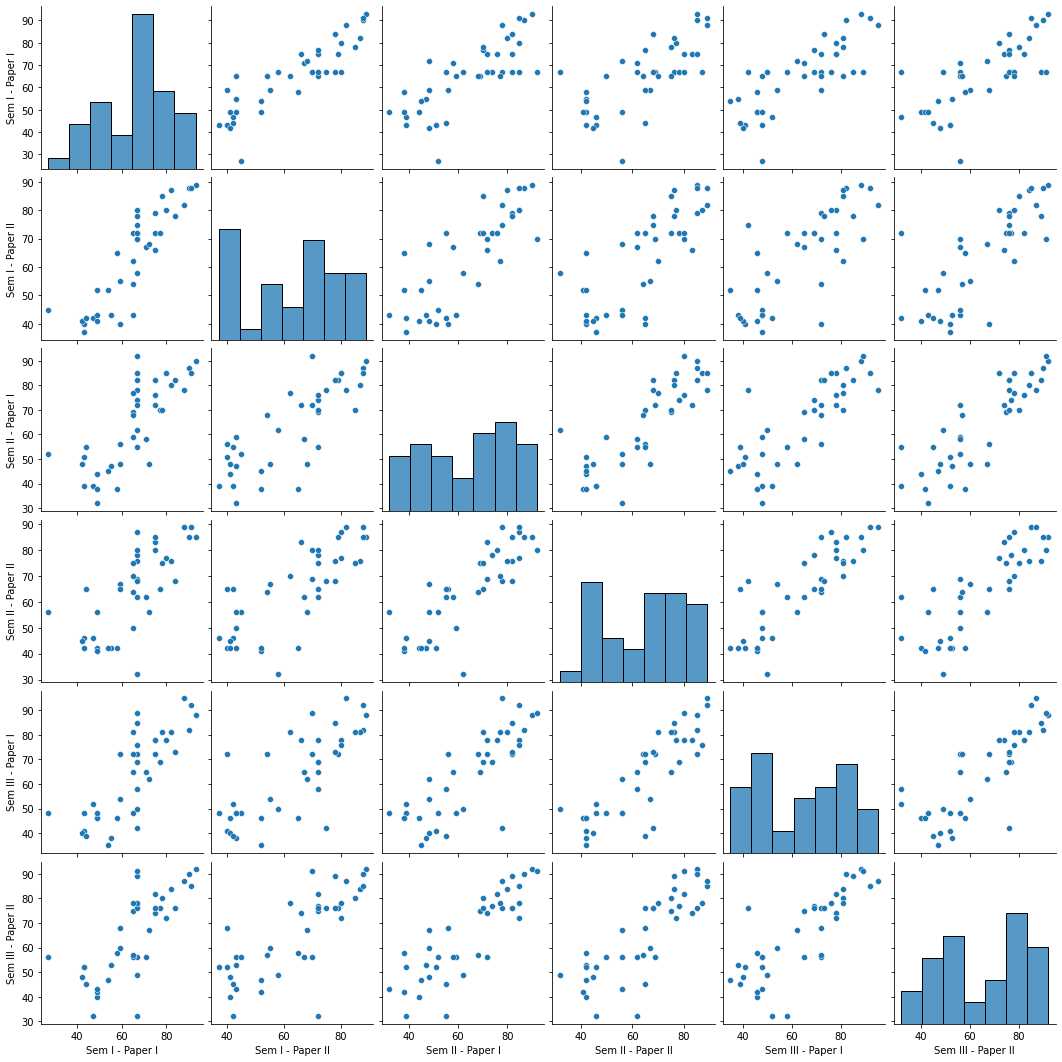

In [ ]:
sns.pairplot(df)

In [ ]:
df["Sem IV"] = df["Sem IV"].replace("P", 1)
df["Sem IV"] = df["Sem IV"].replace("F", 0)

In [ ]:
df.head()

,Sem I - Paper I,Sem I - Paper II,Sem II - Paper I,Sem II - Paper II,Sem III - Paper I,Sem III - Paper II,Sem IV
Roll No,,,,,,,
1,75,66,72,83,78,74,1
2,55,43,47,42,38,53,0
3,67,78,82,76,85,89,1
4,93,89,90,85,88,92,1
5,43,37,39,46,48,52,0


In [ ]:
features = df.drop(columns = ["Sem IV"])
label = df["Sem IV"]

In [ ]:
normalizer = tf.keras.layers.Normalization(axis = -1)
normalizer.adapt(features)

In [ ]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(6, input_shape = [6]),
    tf.keras.layers.Dense(6, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "softmax")
])

model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
!pip install git+https://github.com/soumalyapakrashi/ann-visualizer@master

  Cloning https://github.com/soumalyapakrashi/ann-visualizer (to revision master) to /tmp/pip-req-build-xaaahyyd
  Running command git clone -q https://github.com/soumalyapakrashi/ann-visualizer /tmp/pip-req-build-xaaahyyd


In [ ]:
from ann_visualizer.visualize import ann_viz
import graphviz
graph = ann_viz(model, title = "Marks Prediction")

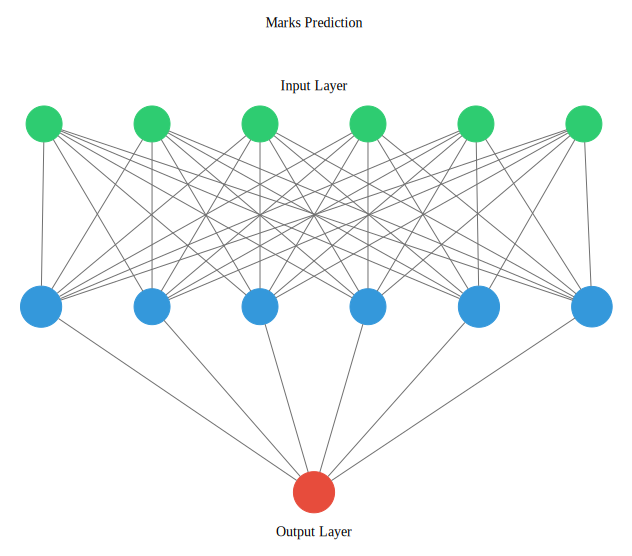

In [ ]:
graph

In [ ]:
history = model.fit(features, label, epochs = 50, validation_split = 0.2)

Epoch 1/50
1/1 [==============================] - 1s 587ms/step - loss: 0.6457 - accuracy: 0.7000 - val_loss: 0.4084 - val_accuracy: 0.6000
Epoch 2/50
1/1 [==============================] - 0s 23ms/step - loss: 0.6427 - accuracy: 0.7000 - val_loss: 0.4083 - val_accuracy: 0.6000
Epoch 3/50
1/1 [==============================] - 0s 22ms/step - loss: 0.6398 - accuracy: 0.7000 - val_loss: 0.4082 - val_accuracy: 0.6000
Epoch 4/50
1/1 [==============================] - 0s 24ms/step - loss: 0.6370 - accuracy: 0.7000 - val_loss: 0.4081 - val_accuracy: 0.6000
Epoch 5/50
1/1 [==============================] - 0s 21ms/step - loss: 0.6342 - accuracy: 0.7000 - val_loss: 0.4082 - val_accuracy: 0.6000
Epoch 6/50
1/1 [==============================] - 0s 23ms/step - loss: 0.6316 - accuracy: 0.7000 - val_loss: 0.4082 - val_accuracy: 0.6000
Epoch 7/50
1/1 [==============================] - 0s 21ms/step - loss: 0.6290 - accuracy: 0.7000 - val_loss: 0.4082 - val_accuracy: 0.6000
Epoch 8/50
1/1 [==========

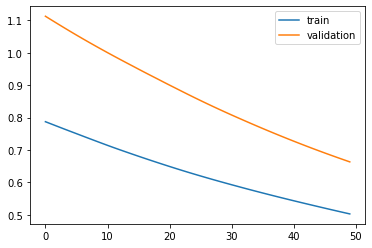

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "validation"])
plt.show()